# CREDIT CARD CLUSTERING

We have the data of 8950 active credit card users. We shall fit the data to a clustering model and derive inferences from it.

Source of the data: Kaggle

The proceedure will be as follows:
1. Loading and understanding the dataset
2. Cleaning and Preprocessing the data
3. Fitting the data to K-Means cluster model 
4. Evaluation
5. Data visualisation techniques to understand relationship between variables 
6. Conclusions

## Loading and Understanding the dataset
Let us first load the data and perform various functions to understand it.

In [24]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
%matplotlib inline

In [5]:
#Reading the dataset
df=pd.read_csv("credit card dataset.csv")

#Displaying first five rows of the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
#Displaying size of the dataset
df.shape

(8950, 18)

In [7]:
#Displaying all columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Below mentioned list explains what these column titles mean. 
1. CUST_ID: Identification of Credit Card holder (Categorical)
2. BALANCE: Balance amount left in their account to make purchases 
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFF_PURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY:  How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced"
13. PURCHASES_TRX: Number of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user
17. PRC_FULL_PAYMENT: Percent of full payment paid by user
18. TENURE: Tenure of credit card service for user

[The explanation has been taken from the information available along with the dataset on Kaggle.]

In [8]:
#Displaying datatype of each column
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Here, CUST_ID is of object type. We don't require this column. Hence, we'll drop it to save memory.

In [9]:
#Dropping the Customer Id column
cc = df.drop(columns='CUST_ID')

#We have stored the modified dataset in 'cc'

#Displaying first 5 rows after dropping required columns
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
#Displaying size of the dataset after dropping required columns
cc.shape

(8950, 17)

After dropping the CUST_ID column, we are left with 17 columns with integer datatype values. We are good to go!

In [11]:
#Displaying count, mean, standard deviation and quartiles
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
#Checking null values
cc.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There is 1 null value in CREDIT_LIMIT and 313 null values in MINIMUM_PAYMENTS. We shall deal with them in the data cleaning and preprocessing part.

We will now check for outliers in the data. If found, we will have to deal with them in order to have a good fit of the model.

We shall use the interquartile range to look for outliers since it is the most widely used method. 
For that we have to estimate the upper bound and lower bound, calculate quartiles and interquartile range.

We shall define  a function which performs this task so that we can call this function again and again to look for outliers in each column separately.

In [13]:
#Checking outliers

#defining the function
def outlier_check(data):
    #First quartile
    Q1 = data.quantile(0.25)
    #Third quartile
    Q3 = data.quantile(0.75)
    #Interquartile range
    IQR = Q3 - Q1
    #Estimating lower bound
    minimum = Q1 - (1.5 * IQR)
    #Estimating upper bound
    maximum = Q3 + (1.5 * IQR)
    #The data points that lie above the upper bound or below the lower bound are called outliers. 
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    if num_outliers ==0:
        return "No Outliers"
    else:
        return "Outliers are present."

#Now we will check for outliers for each column.
for column in cc:
    data =cc[column]
    m={outlier_check(data)}
    print(f'{column}: {m}')

BALANCE: {'Outliers are present.'}
BALANCE_FREQUENCY: {'Outliers are present.'}
PURCHASES: {'Outliers are present.'}
ONEOFF_PURCHASES: {'Outliers are present.'}
INSTALLMENTS_PURCHASES: {'Outliers are present.'}
CASH_ADVANCE: {'Outliers are present.'}
PURCHASES_FREQUENCY: {'No Outliers'}
ONEOFF_PURCHASES_FREQUENCY: {'Outliers are present.'}
PURCHASES_INSTALLMENTS_FREQUENCY: {'No Outliers'}
CASH_ADVANCE_FREQUENCY: {'Outliers are present.'}
CASH_ADVANCE_TRX: {'Outliers are present.'}
PURCHASES_TRX: {'Outliers are present.'}
CREDIT_LIMIT: {'Outliers are present.'}
PAYMENTS: {'Outliers are present.'}
MINIMUM_PAYMENTS: {'Outliers are present.'}
PRC_FULL_PAYMENT: {'Outliers are present.'}
TENURE: {'Outliers are present.'}


As we note above, there are outliers in each column except PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. So, we shall remove these in the data cleaning and preprocessing step.

## Cleaning and preprocessing the data

Since we have gained a good knowledge about the dataset, let us now clean and preprocess the data.

In the previous step, we checked for null values and outliers. We shall deal with them in this step and also standardize the data.

Let us first remove the outliers.

In [14]:
#Removing outliers
for column in cc.columns:
    d = cc[column] 
    #First quartile    
    Q1 = d.quantile(0.25)
    #Third quartile
    Q3 = d.quantile(0.75)
    IQR = Q3 - Q1
    #Estimating lower bound
    minimum = Q1 - (1.5 * IQR)
    #Estimating upper bound
    maximum = Q3 + (1.5 * IQR)
    #The data points that lie above the upper bound or below the lower bound are called outliers. 
    outliers = ((d < minimum) |(d > maximum))
    #Replacing outliers with NaN which will be eventually dealt with in the next step.
    cc[column].loc[outliers]=np.nan
#Displaying number of outliers in each column which are now replaced with NaN values    
cc.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

Now that we have removed outliers and replaced them with NaN values, we shall deal with all these null values in the below step.

There are various methods to fill missing values in a dataset. However, we'll be using KNN Imputer to predict all null values since it is considered one of the most effective techniques.

In [15]:
#Filling null values
imputer=KNNImputer()
cc_modified = pd.DataFrame(imputer.fit_transform(cc), columns=cc.columns)
cc_modified.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

So, now null values are also dealt with. Let us now standardize our data.


In [16]:
#Standardizing the data
std_cc = pd.DataFrame(StandardScaler().fit_transform(cc_modified), columns=cc_modified.columns)

#Displaying first 5 rows after data standardization
std_cc.head()




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.938415,-2.648163,-0.769054,-0.668008,-0.453071,-0.648957,-0.806490,-0.744535,-0.707313,-0.747150,-0.681634,-0.780853,-1.058772,-0.990200,-0.849651,-0.449541,0.0
1,1.544889,-1.140713,-0.910890,-0.668008,-0.787709,0.880535,-1.221758,-0.744535,-0.916995,1.029213,0.865275,-0.966433,0.877124,2.904565,1.216882,2.720181,0.0
2,0.989314,0.366737,0.238620,1.571492,-0.787709,-0.648957,1.269843,2.115073,-0.916995,-0.747150,-0.681634,0.147050,1.038449,-0.570632,0.230934,-0.449541,0.0
3,0.338573,0.065247,1.317747,0.229675,-0.787709,-0.354281,-1.014125,-0.377920,-0.916995,-0.155031,-0.294907,-0.873643,1.038449,-1.191668,1.304805,-0.449541,0.0
4,-0.328254,0.366737,-0.887102,-0.621664,-0.787709,-0.648957,-1.014125,-0.377920,-0.916995,-0.747150,-0.681634,-0.873643,-0.994242,-0.514457,-0.616417,-0.449541,0.0


## Fitting of K-means cluster model

Let us first fit the data to a K-means cluster model. 
This will be done in below mentioned steps:
1. First we shall plot a graph to find the elbow point.
2. The elbow point will be our optimal k for k-means clustering.

Let us first do the modeling between CREDIT_LIMIT and PURCHASES_FREQUENCY from our standardised dataframe.

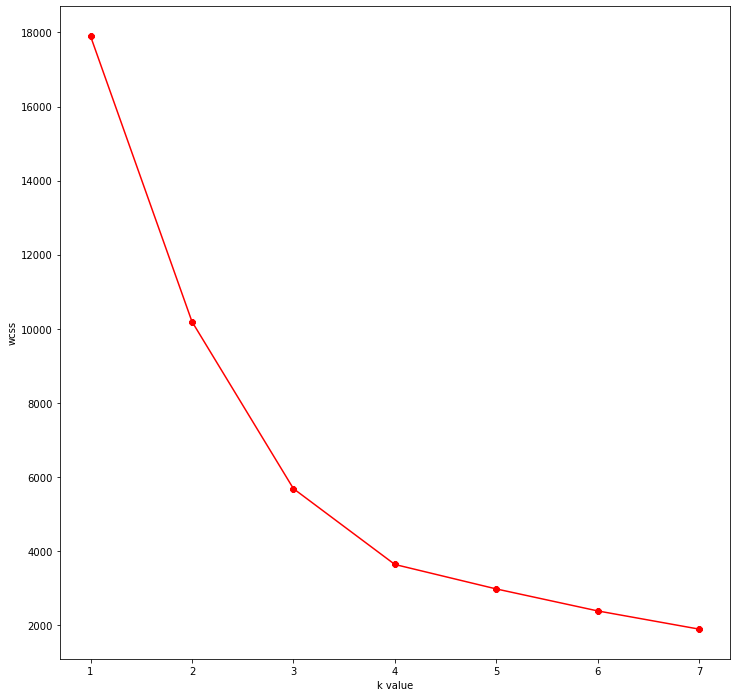

In [17]:
#Plotting a graph to locate elbow point and eventually find our optimal k of the standardised dataframe
X1=std_cc.loc[:,["CREDIT_LIMIT","PURCHASES_FREQUENCY"]].values
wcss=[]
for k in range(1,8):
    kmeans=KMeans(n_clusters=k,random_state=0,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,12))
plt.grid
plt.plot(range(1,8),wcss,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

As we can see here, the elbow point lies at the value 4. Hence, our optimal k = 4. We shall now calculate the labels and centroids of the clusters.

In [18]:
#Calculating labels of the standardised dataframe
kmeans=KMeans(n_clusters=4,random_state=0)
label=kmeans.fit_predict(X1)
print(label)

[1 3 2 ... 0 1 0]


In [19]:
#Computing centroids of the clusters of the standardised dataframe between CREDIT_LIMIT and PURCHASES_FREQUENCY
print(kmeans.cluster_centers_)

[[-0.56756105  0.87473808]
 [-0.61586785 -0.93448822]
 [ 1.29066808  1.03122878]
 [ 1.23048301 -0.84006859]]


## Evaluation:


We have done our modeling. Let us now see the level of accuracy of our model. We shall check it using "The Silhouette Coefficient".

In [25]:
#Computing the Silhouette Coefficient of the PC data modeling
print(f'Silhouette Score = {silhouette_score(X1, label)}')

Silhouette Score = 0.506662577570664


The score indicates that our clustering is pretty much good.

We shall now visualise the relationship between CREDIT_LIMIT and PURCHASES_FREQUENCY through a scatter plot in the Data Visualisation step.

## Data visualisation (Scatter Plot)

Let us plot a scatter chart showing the relationship between CREDIT_LIMIT and PURCHASES_FREQUENCY before custering.

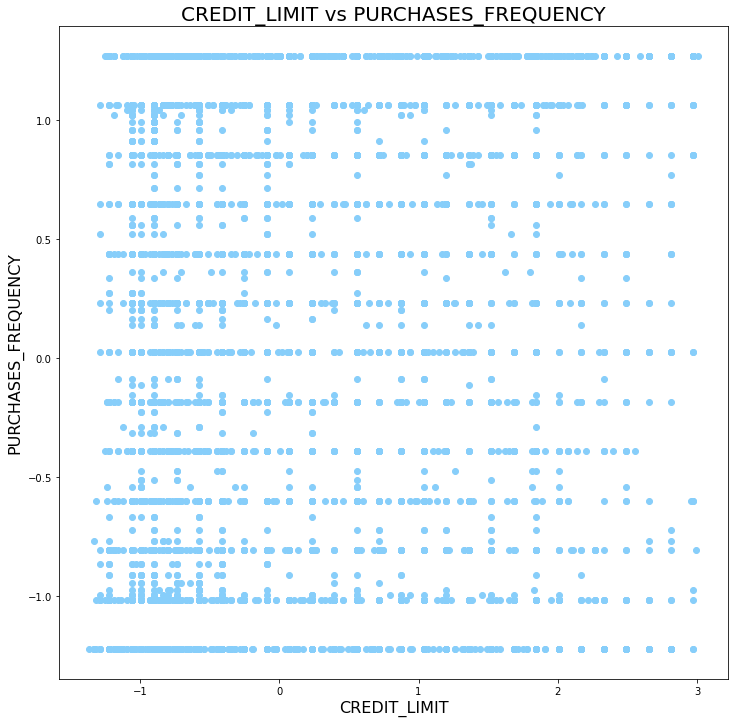

In [22]:
#Plotting scatter plot between Credit limit and purchases frequency from the standardized dataframe before clustering
plt.figure(figsize = (12,12))
plt.title("CREDIT_LIMIT vs PURCHASES_FREQUENCY", fontsize = 20)
plt.scatter(std_cc["CREDIT_LIMIT"], std_cc["PURCHASES_FREQUENCY"], color = "lightskyblue")
plt.xlabel("CREDIT_LIMIT", fontsize = 16)
plt.ylabel("PURCHASES_FREQUENCY", fontsize = 16)
plt.show()

Let us now plot a scatter chart showing the relationship between CREDIT_LIMIT and PURCHASES_FREQUENCY after custering.

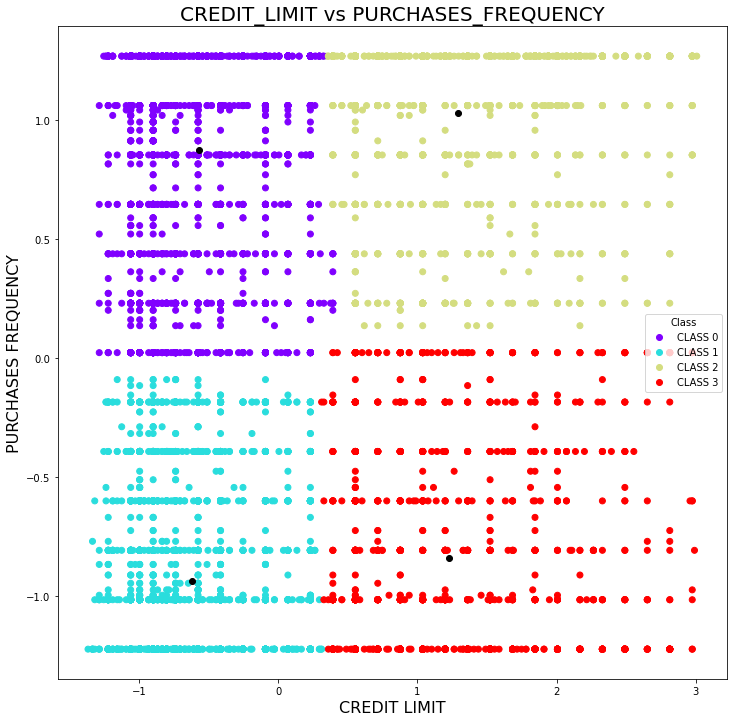

In [646]:
#Plotting scatter plot between Credit limit and purchases frequency from the standardized dataframe after clustering
plt.figure(figsize = (12, 12))
ctg_names = ['CLASS 0', 'CLASS 1', 'CLASS 2','CLASS 3']
scatter=plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('CREDIT_LIMIT vs PURCHASES_FREQUENCY',fontsize=20)
plt.xlabel('CREDIT LIMIT',fontsize=16)
plt.ylabel('PURCHASES FREQUENCY',fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=ctg_names,title="Class")
plt.show()

We have plotted two scatter charts. First plot shows relationship between CREDIT_LIMIT and PURCHASES_FREWUENCY. After implementing K-means cluster, we have plotted one more scatter chart showing the relationship between the same two entities with four clusters.



## Conclusion (Scatter Plot):
The conclusion is pretty straightforward. 

CLASS 0: Some customers have low credit limit and high purchase frequency.

CLASS 1: Some customers have low credit limit and low purchase frequency, which is prettty normal as you cannot spend more since you have a low credit limit.

CLASS 2: Some customers have high credit limit and a high purchase frequency.

CLASS 3: Some customers have high credit limit yet a low purchase frequency.

[Classes are subject to the above scatter chart only.]

## Data Visualisation (Radar Chart):

To know more about the above classes and the reason behind these conclusions, we shall proceed further and perform the following steps:
1. Predict labels for the entire dataframe(std_cc) using kmeans cluster.
2. Use these labels to plot a radar chart.

Before moving on to the next step, let us fit the entire data to a K-Means cluster and compute the labels.

In [23]:
#Computing labels by fitting the data to kmeans cluster
labels_new=kmeans.fit_predict(std_cc)

In [648]:
#printing the labels
print(labels_new)

[3 0 2 ... 1 3 2]


In [649]:
#adding labels to standardised dataframe
std_cc['LABELS'] = labels_new

In [651]:
#defining the radar chart(spider chart) function
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'RADAR CHART ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

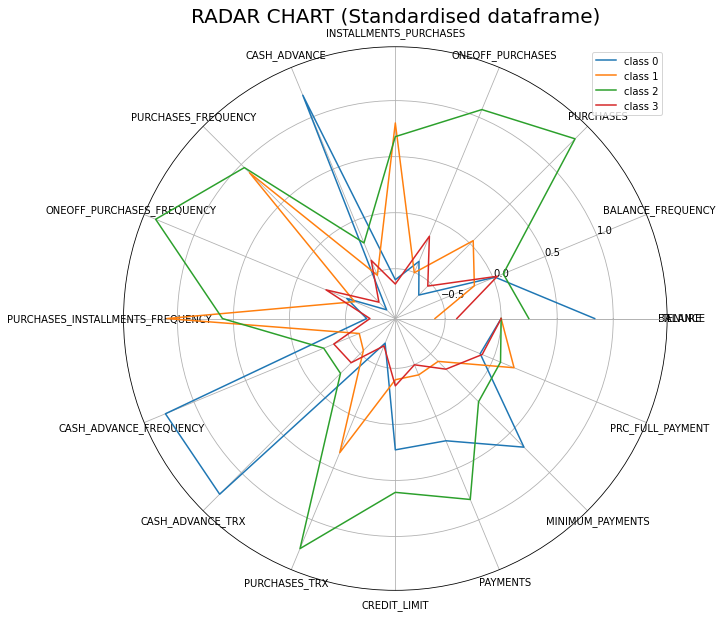

In [653]:
#plotting the radar chart of the standardised data
spider_plot(std_cc, 'Standardised dataframe')

## Conclusion (Radar Chart):

Let us now give the reasoning behind the obtained conclusions through the scatter chart and provide detailed inferences about each class regarding each feature.

**CLASS 1:** The customers of this class have the lowest CREDIT_LIMIT and the lowest BALANCE but a really high PURCHASES_FREQUENCY and the highest PURCHASES_INSTALLMENTS_FREQUENCY. This implies that customers of this class purchase a lot even though they have a low credit limit and low balance. This is possible as they purchase items through installments which justifies the low CASH_ADVANCE_FREQUENCY and low CASH_ADVANCE_TRX. Hence, we can conclude that the customers of this class purchase a lot even though they have a low balance and low credit limit. This shows that these customers have either have a lot of important expenses with small pockets or they can be spendthrifts. They really need to look into this matter of spending high!

**CLASS 3:** The customers of this class have a low CREDIT_LIMIT and an even lower PURCHASES_FREQUENCY. The reasoning behind this is pretty straightforward. A smaller pocket allows small buying. These customers also have a fairly low PURCHASES_INSTALLMENTS_FREQUENCY, a low BALANCE which further justifies the low PURCHASES. Hence, we can conclude that the customers of this class are very economical. They spend only as much as their pockets allow.

**CLASS 2:** The customers of this class have the highest CREDIT_LIMIT and an even higher PURCHASE_FREQUENCY. So, when we look at other features of this class, we note that their PURCHASES_INSTALLMENTS_FREQUENCY is quite high along with a high ONEOFF_PURCHASES_FREQUENCY and high PURCHASES with a good BALANCE. This concludes that customers of this class earn and spend which is as simple as it sounds. 

**CLASS 0:** The customers of this class can be said to have a fairly high CREDIT_LIMIT and an extremely low PURCHASES_FREQUENCY. They also have a low PURCHASES_INSTALLMENTS_FREQUENCY , highest CASH_ADVANCE and the highest BALANCE. Hence, it can be said that these customers believe in more savings. It can be said that despite having a high credit limit, they conduct low purchases and of all purchases made, high cash is paid in advance which must have been saved from a long period which eventually justifies their high balance. It can also be said that these customers don't like to use credit cards much and prefer using their prevailing debit cash for conducting purchases which indicates that they must be having a large debit cash sum.

[Classes are subject to the above radar chart only.]

**Author:** Amisha Sahoo

**Dataset source:** Kaggle